In [ ]:
import pandas as pd
import numpy as np
print(np.__version__)

2.0.2


In [ ]:
data = pd.read_csv("./diabetes_data_upload.csv")
data.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
data.shape


(520, 17)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
data.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.isnull().sum()


,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [ ]:
data["class"].value_counts()


,count
class,
Positive,320
Negative,200


# veri setimizde eksik veri yok o yuzden direkt bos yerleri doldurma asamasini atlattik

In [ ]:
data.select_dtypes(include='object').columns


Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Kategorik sütunları otomatik olarak dönüştürme
for column in data.select_dtypes(include='object').columns:
    data[column] = label_encoder.fit_transform(data[column])

In [ ]:
data = pd.get_dummies(data, drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Hedef sütunu hariç tüm sütunları ölçeklendir
features = data.drop('class', axis=1)
scaled_features = scaler.fit_transform(features)

# Tekrar DataFrame’e dönüştürelim
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['class'] = data['class']


In [ ]:
scaled_data.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,-0.661367,0.765092,-0.992337,1.109847,-0.846269,0.839594,-0.915126,-0.535844,-0.901025,1.027295,-0.565506,1.084312,-0.869918,1.290994,1.380227,2.215647,1
1,0.821362,0.765092,-0.992337,-0.901025,-0.846269,0.839594,-0.915126,-0.535844,1.109847,-0.973430,-0.565506,-0.922244,1.149534,-0.774597,1.380227,-0.451335,1
2,-0.578993,0.765092,1.007722,-0.901025,-0.846269,0.839594,1.092746,-0.535844,-0.901025,1.027295,-0.565506,1.084312,-0.869918,1.290994,1.380227,-0.451335,1
3,-0.249498,0.765092,-0.992337,-0.901025,1.181657,0.839594,1.092746,1.866215,-0.901025,1.027295,-0.565506,1.084312,-0.869918,-0.774597,-0.724518,-0.451335,1
4,0.986110,0.765092,1.007722,1.109847,1.181657,0.839594,1.092746,-0.535844,1.109847,1.027295,1.768328,1.084312,1.149534,1.290994,1.380227,2.215647,1


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = scaled_data.drop('class', axis=1)  # Özellikler (semptomlar vs.)
y = scaled_data['class']               # Etiket (diyabet durumu)


BUrda A b ile de veri setini ayiriyoeuz cunku diger egitim araclari kulanirken A b kulanicaz en temiz hali verinin. Cunku x y ile yapialn asada karar agaci yapilirken degistirildi o yuzden A b de tanittik

In [ ]:
A = scaled_data.drop('class', axis=1)  # Özellikler (semptomlar vs.)
b = scaled_data['class']               # Etiket (diyabet durumu)


In [ ]:
A_train, A_test, b_train, b_test = train_test_split(
    A, b,
    test_size=0.2,  # %20 test seti olacak
    random_state=42  # Sonuçların tekrar üretilebilir olması için sabit bir sayı
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # %20 test seti olacak
    random_state=42  # Sonuçların tekrar üretilebilir olması için sabit bir sayı
)


In [ ]:
print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)


Eğitim seti boyutu: (416, 16)
Test seti boyutu: (104, 16)


# Karar agaci kulanarak egitim

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
model = DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)

In [ ]:
# Modeli oluştur
model = DecisionTreeClassifier(random_state=42)

# Eğitimi yap (train)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Doğruluk oranı
print("Doğruluk:", accuracy_score(y_test, y_pred))

# Detaylı performans raporu
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

# Karışıklık Matrisi (Confusion Matrix)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Doğruluk: 0.9519230769230769
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104

Confusion Matrix:
 [[33  0]
 [ 5 66]]


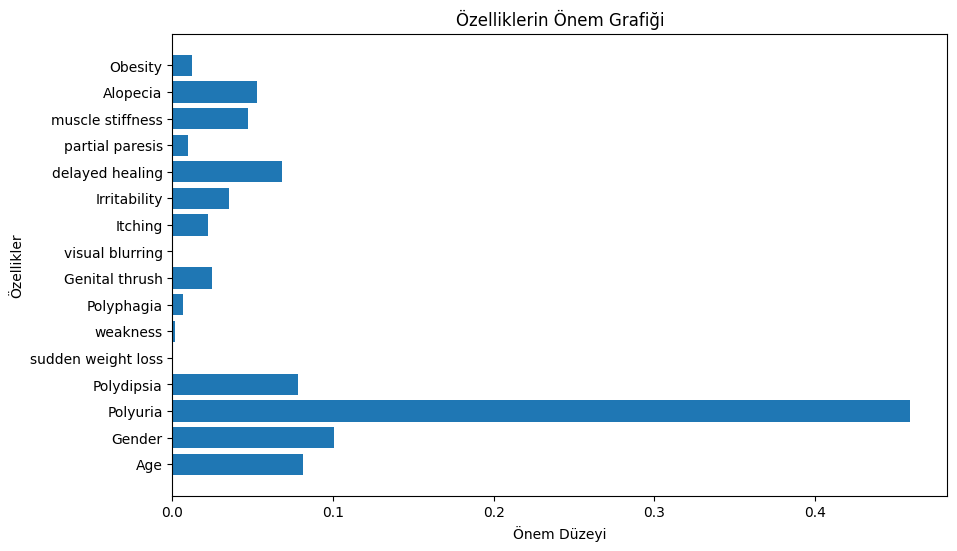

In [ ]:
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, feature_importance)
plt.xlabel("Önem Düzeyi")
plt.ylabel("Özellikler")
plt.title("Özelliklerin Önem Grafiği")
plt.show()


In [ ]:
print(scaled_data.columns)


Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


In [ ]:
X = scaled_data.drop(['weakness', 'sudden weight loss','Polyphagia','visual blurring','partial paresis', 'class'], axis=1)
y = scaled_data['class']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Burda bir hata aldik veri setimizden gereksiz columbleri cikardiktan sonra veri setimiz tekrar train ve testlere ayirmayi unutmusuz bu sebebden kodumuz o columbleri var zaneterek calismaya devam etti buda bizim basari oranimizde hic bir degisikleri gorememize sebeb oldu sonra hatayi fark edince train veri setini ve test veri setini ayirdik ve tekrar calistirdik ve setimizin basari oraninin columbleri sildikden sonra ufak bir sekilde degistigini far ettik

In [ ]:
# 3. Modeli oluştur ve eğit
model = DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print("Doğruluk:", accuracy_score(y_test, y_pred))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Doğruluk: 0.9519230769230769
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104

Confusion Matrix:
 [[33  0]
 [ 5 66]]


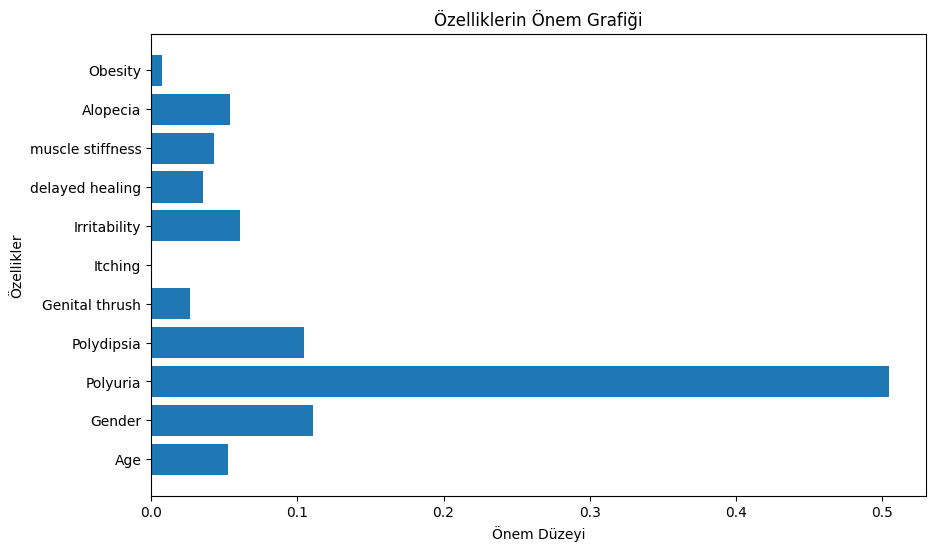

In [ ]:
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, feature_importance)
plt.xlabel("Önem Düzeyi")
plt.ylabel("Özellikler")
plt.title("Özelliklerin Önem Grafiği")
plt.show()

# burda tekrar veri setimizin columb etkileri tekrar bakinca Itching de onemsiz oldugunu goruyoruz ve bunu hem cikararak deneyelim

In [ ]:
X = scaled_data.drop(['Itching', 'class'], axis=1)
y = scaled_data['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# 3. Modeli oluştur ve eğit
model = DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print("Doğruluk:", accuracy_score(y_test, y_pred))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Doğruluk: 0.9519230769230769
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104

Confusion Matrix:
 [[33  0]
 [ 5 66]]


itchingi drop ettik ve basari orani degismedi

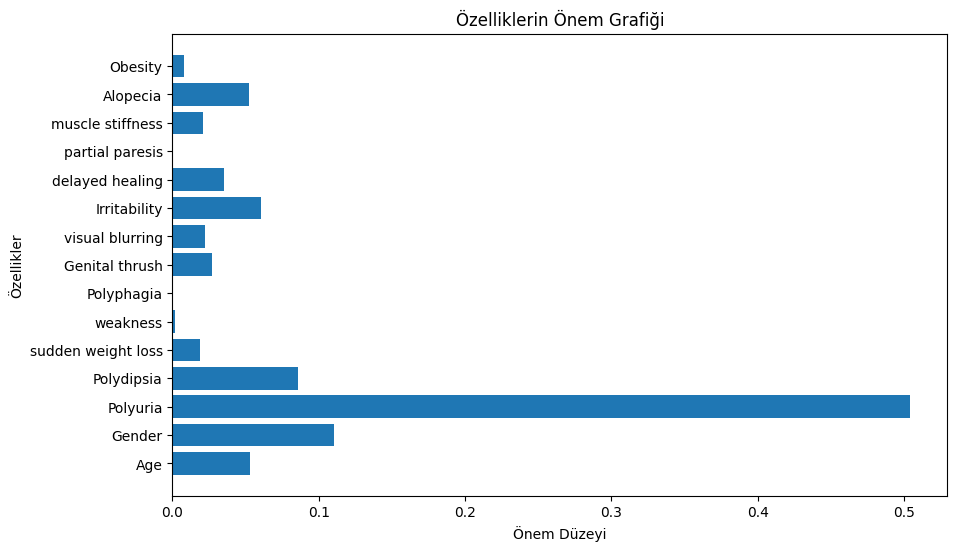

In [ ]:
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, feature_importance)
plt.xlabel("Önem Düzeyi")
plt.ylabel("Özellikler")
plt.title("Özelliklerin Önem Grafiği")
plt.show()

Burda yine Weakness ve Polyphagia columblerinin etkisiz oldugunu goruyoruz bunlari dan cikararak denemeye calisalim

In [ ]:
X = scaled_data.drop(['weakness','Polyphagia','partial paresis', 'class'], axis=1)
y = scaled_data['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# 3. Modeli oluştur ve eğit
model = DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Doğruluk:", accuracy_score(y_test, y_pred))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Doğruluk: 0.9519230769230769
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104

Confusion Matrix:
 [[33  0]
 [ 5 66]]


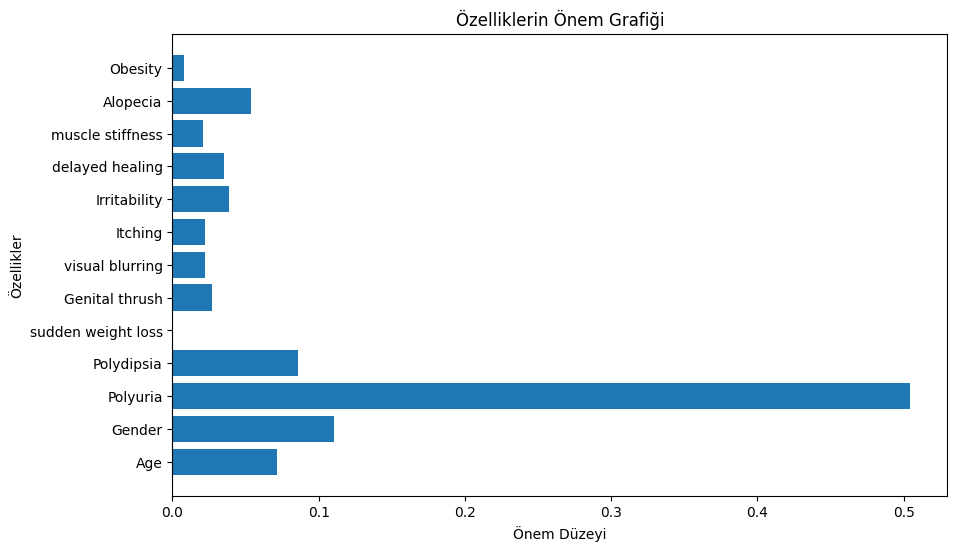

In [ ]:
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, feature_importance)
plt.xlabel("Önem Düzeyi")
plt.ylabel("Özellikler")
plt.title("Özelliklerin Önem Grafiği")
plt.show()

In [ ]:
X = scaled_data.drop(['sudden weight loss',  'class'], axis=1)
y = scaled_data['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# 3. Modeli oluştur ve eğit
model = DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Doğruluk:", accuracy_score(y_test, y_pred))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Doğruluk: 0.9807692307692307
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.97      0.99        71

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104

Confusion Matrix:
 [[33  0]
 [ 2 69]]


# Sudden weight loss columb silndi ondan sonra basari oranimiz 98 yukseldi bu cok iyi bir sonuc

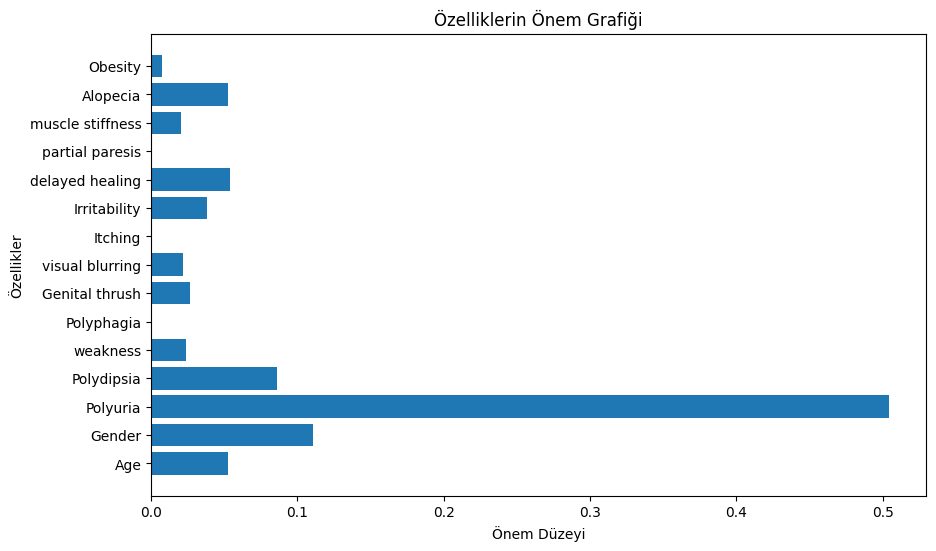

In [ ]:
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, feature_importance)
plt.xlabel("Önem Düzeyi")
plt.ylabel("Özellikler")
plt.title("Özelliklerin Önem Grafiği")
plt.show()

# **Grafik kisimlar Agac yapilari gibi**

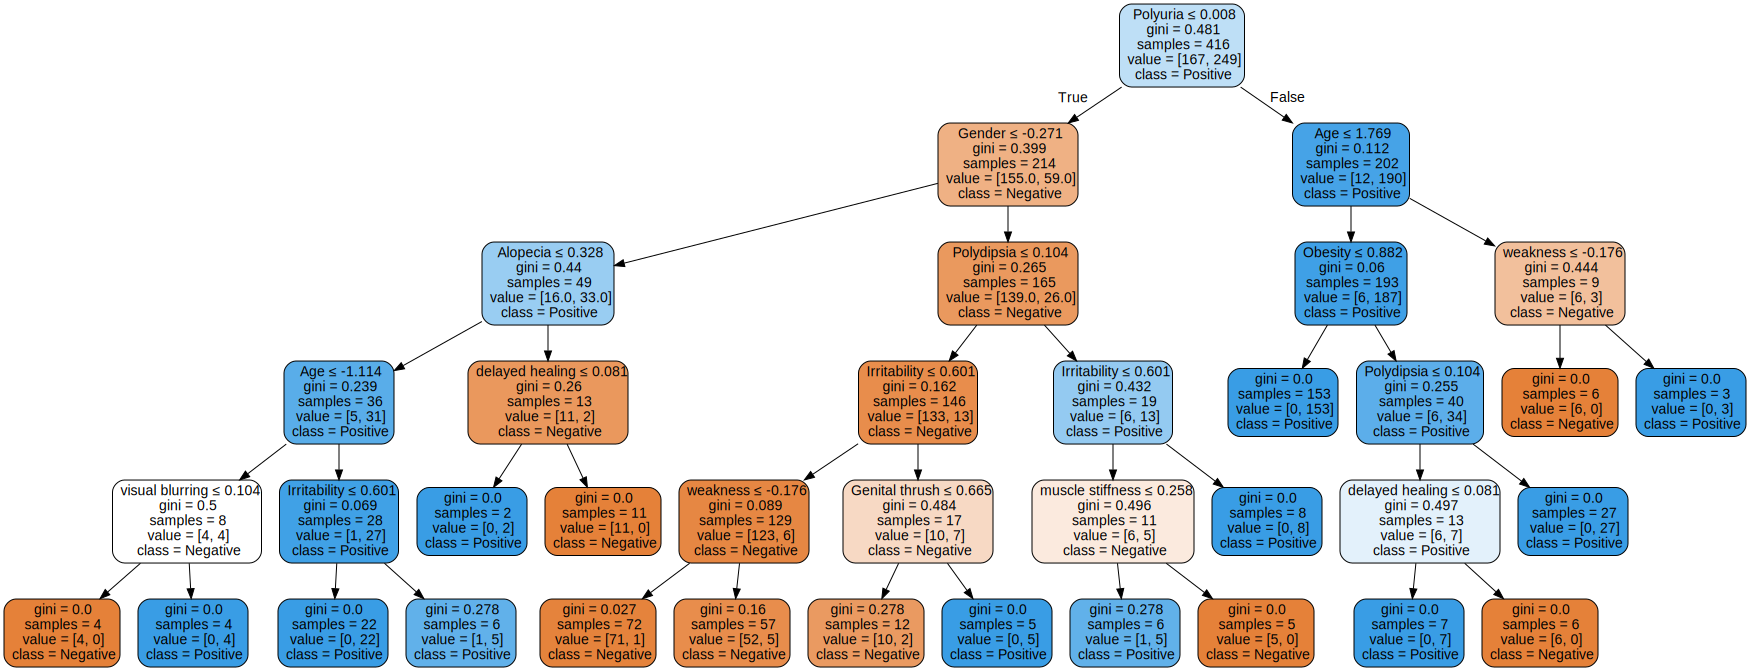

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Ağacı export edelim
dot_data = export_graphviz(
    model,
    feature_names=X.columns,
    class_names=["Negative", "Positive"],
    filled=True, rounded=True,
    special_characters=True
)

# Görselleştirelim
graph = graphviz.Source(dot_data)
graph.render("diabetes_decision_tree", format="png", cleanup=False)  # Dosya kaydedilir
graph


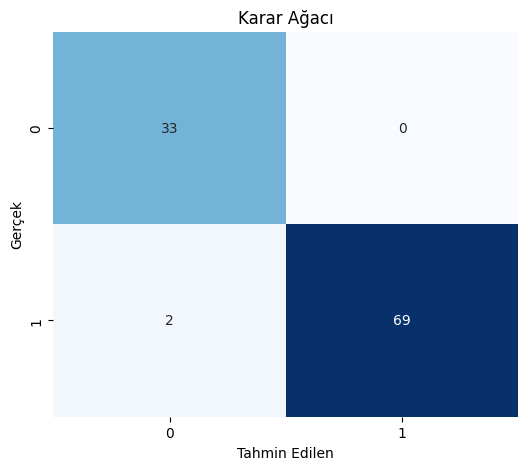

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix oluştur
cm = confusion_matrix(y_test, y_pred)

# Heatmap çizelim
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karar Ağacı')
plt.show()


yukaridaki grafik nerelerda hata yaptigimiz gosterir

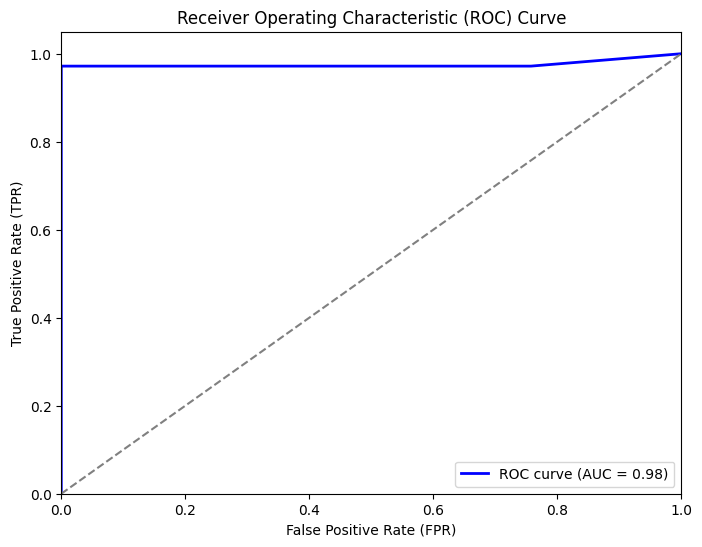

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Modelin tahminlerini alıyoruz
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Eğer model predict_proba kullanıyorsa

# FPR ve TPR'yi hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# AUC'yi hesapla
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random model için diagonal çizgi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
bu grafik basari oranimizi gosteriz

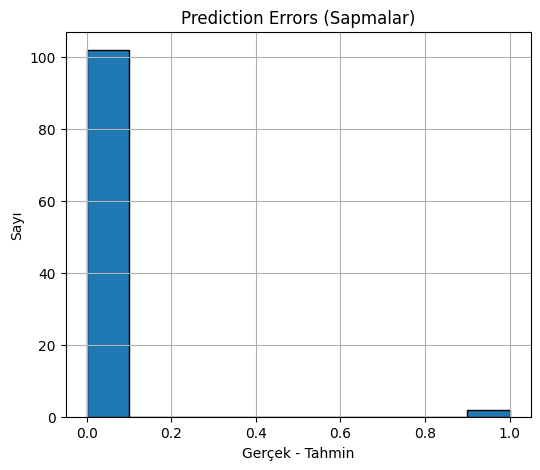

In [ ]:
errors = y_test - y_pred

plt.figure(figsize=(6,5))
plt.hist(errors, bins=10, edgecolor='black')
plt.title('Prediction Errors (Sapmalar)')
plt.xlabel('Gerçek - Tahmin')
plt.ylabel('Sayı')
plt.grid(True)
plt.show()


Tahmin sapmaları nasıl dağılıyor? sorusuna cevap verir

# **modelimiz hazir artik Plk fromatina donusturebiliriz**

In [ ]:
import pickle

# Eğittiğin modeli bir dosyaya kaydet
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(model, file)


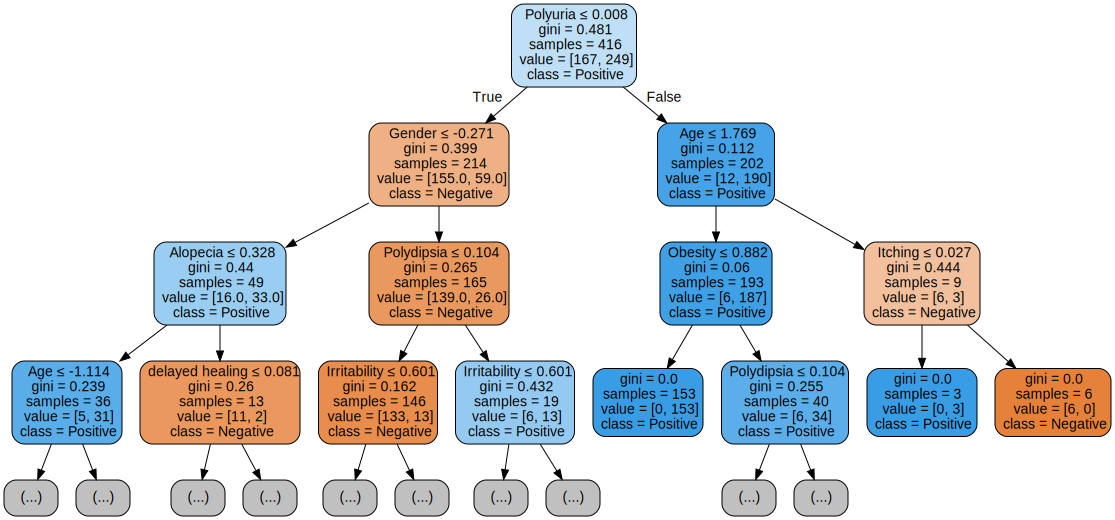

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image  # Jupyter için gerekli

# Ağacı sade çizdirelim (örneğin max_depth=3)
dot_data = export_graphviz(
    model,
    feature_names=X.columns,
    class_names=["Negative", "Positive"],
    filled=True, rounded=True,
    special_characters=True,
    max_depth=3
)

# Görselleştir
graph = graphviz.Source(dot_data)
graph.render("diabetes_decision_tree", format="png", cleanup=False)  # PNG olarak kaydeder
graph  # Jupyter'de görsel olarak gösterir


In [ ]:
dot_data = export_graphviz(
    model,
    feature_names=X.columns,
    class_names=["Negative", "Positive"],
    filled=True, rounded=True,
    special_characters=True,
    proportion=True,  # 👈 kutular daha orantılı olur
    max_depth=3
)


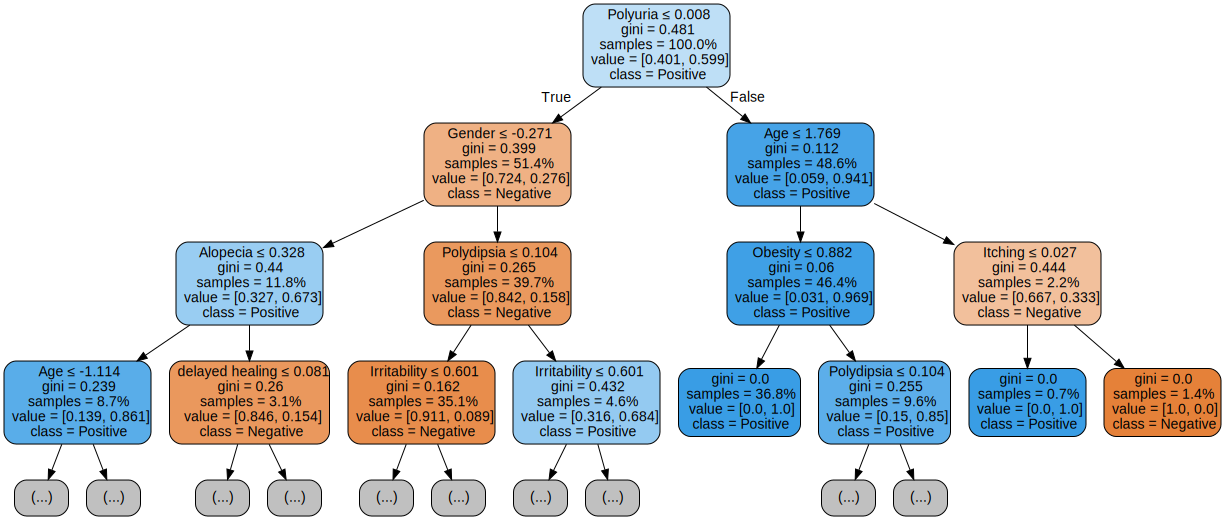

In [ ]:
# Görselleştir
graph = graphviz.Source(dot_data)
graph.render("diabetes_decision_tree", format="png", cleanup=False)  # PNG olarak kaydeder
graph  # Jupyter'de görsel olarak gösterir

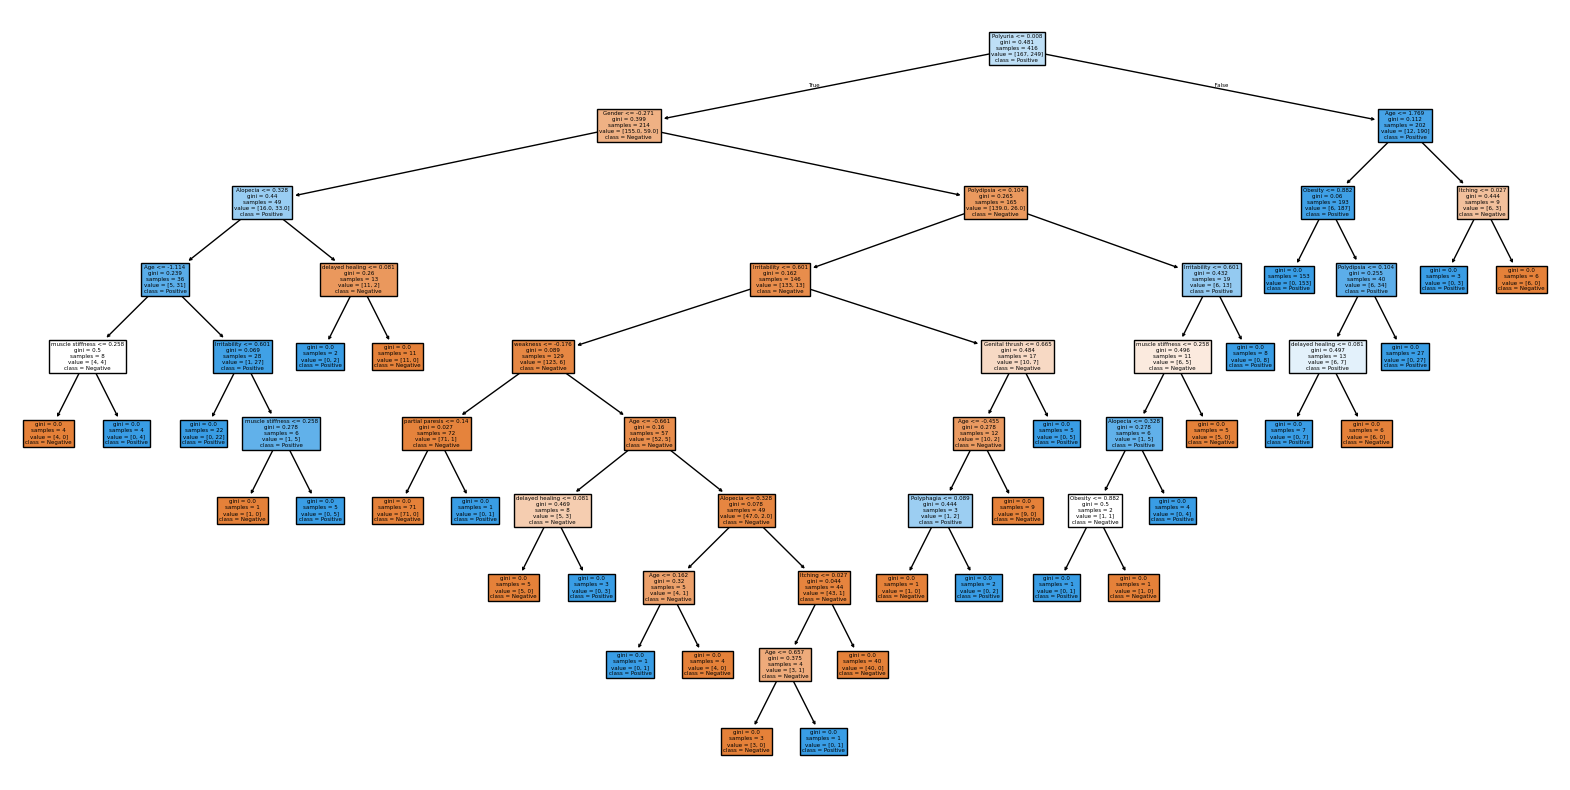

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=["Negative", "Positive"], filled=True)
plt.show()
